## Monitor Class
---

To streamline the process, we produce a lightweight monitoring class that assists in code design. 

The class includes the following methods:
- get_dev
- get_prod
- make_pred
- get_performance_report
- refit

In [1]:
import sys, os, json, tqdm
sys.path.insert(1, "../../")
sys.path.insert(1, "/home/ec2-user/SageMaker/projects-framework/ml4risk")
from src.combine import combine_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.style.use('seaborn')

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings("ignore")

In [2]:
import ml4risk.utils as mu
from src.monitoring.monitor import CustomerRiskV1Report, CustomerRiskV1Monitor

In [3]:
# set up some paths
mmonth = "202103"
project_dir_local = "/home/ec2-user/SageMaker/projects-model/customer-model-v1/"
artifact_path = f"s3://sofi-data-science/jxu/money-risk-models/customer-risk-model/monitor/{mmonth}"

config = mu.load_config(os.path.join(project_dir_local, "config.json"))
context = {"mmonth": mmonth,
           "df_dev_path": os.path.join(project_dir_local, 
                                       "data/combined_all_features/combined_1615694251.feather"),
           "local_artifact_path": os.path.join(project_dir_local, "artifacts",f"monitoring-{mmonth}"),
           "config": config,
           "last_date_sample_end": "2020-01-01"}

---------- getting dev data ----------
df_dev shape:  (8966302, 91)
sample_date max:  2021-03-12 00:00:00
parsing dev dataframe
save to s3
---------- getting prod data ----------
---------- getting predictions using model currently in production ----------


  0%|          | 0/18 [00:00<?, ?it/s]

date: 2020-09-01 00:00:00, shape: (366294, 98), imbalance: 101.05


 56%|█████▌    | 10/18 [00:02<00:01,  4.75it/s]

date: 2020-10-01 00:00:00, shape: (433893, 98), imbalance: 103.9


 61%|██████    | 11/18 [00:04<00:03,  1.98it/s]

date: 2020-11-01 00:00:00, shape: (504084, 98), imbalance: 108.27


 67%|██████▋   | 12/18 [00:07<00:05,  1.13it/s]

date: 2020-12-01 00:00:00, shape: (568715, 98), imbalance: 96.56


 72%|███████▏  | 13/18 [00:11<00:06,  1.32s/it]

date: 2021-01-01 00:00:00, shape: (651893, 98), imbalance: 146.36


 78%|███████▊  | 14/18 [00:14<00:07,  1.82s/it]

date: 2021-02-01 00:00:00, shape: (725245, 98), imbalance: 206.56


 83%|████████▎ | 15/18 [00:19<00:07,  2.36s/it]

date: 2021-02-19 00:00:00, shape: (755949, 98), imbalance: 290.41


 89%|████████▉ | 16/18 [00:23<00:05,  2.84s/it]

date: 2021-03-01 00:00:00, shape: (770065, 98), imbalance: 335.98


 94%|█████████▍| 17/18 [00:27<00:03,  3.26s/it]

date: 2021-03-12 00:00:00, shape: (786936, 98), imbalance: 440.61


  0%|          | 0/9 [00:00<?, ?it/s]

---------- getting performance results on the current model ----------
generating report for 2020-09-01


 11%|█         | 1/9 [00:18<02:30, 18.76s/it]

generating report for 2020-10-01


 22%|██▏       | 2/9 [00:40<02:24, 20.67s/it]

generating report for 2020-11-01


 33%|███▎      | 3/9 [01:06<02:18, 23.10s/it]

generating report for 2020-12-01


 44%|████▍     | 4/9 [01:36<02:08, 25.71s/it]

generating report for 2021-01-01


 56%|█████▌    | 5/9 [02:11<01:55, 28.92s/it]

generating report for 2021-02-01


 67%|██████▋   | 6/9 [02:49<01:36, 32.10s/it]

generating report for 2021-02-19


 78%|███████▊  | 7/9 [03:29<01:09, 34.69s/it]

generating report for 2021-03-01


 89%|████████▉ | 8/9 [04:10<00:36, 36.72s/it]

generating report for 2021-03-12


100%|██████████| 9/9 [04:52<00:00, 32.49s/it]


dev snapshot date:  2020-03-14 00:00:00
df_dev shape:  (182453, 100)
df_prod shape:  (953371, 56)
---------- refitting ----------


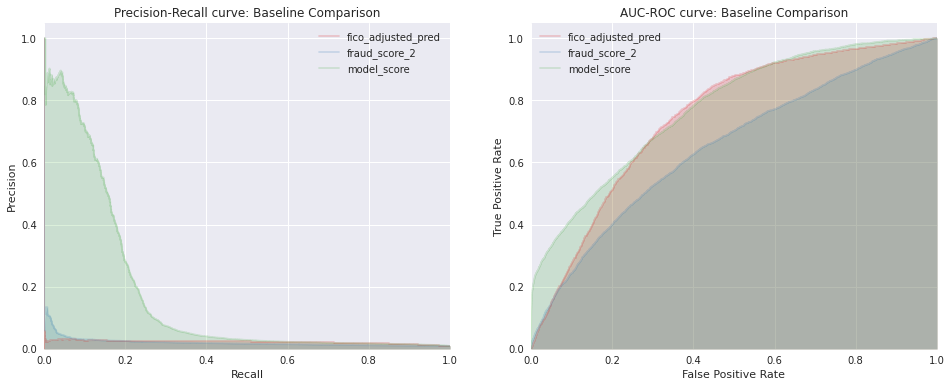

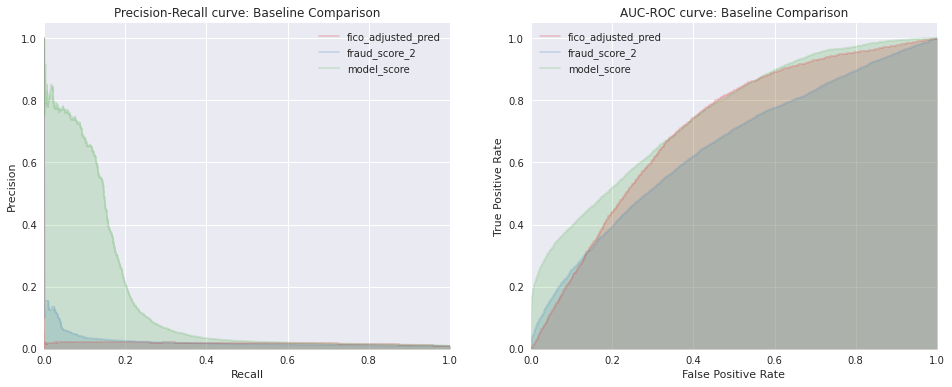

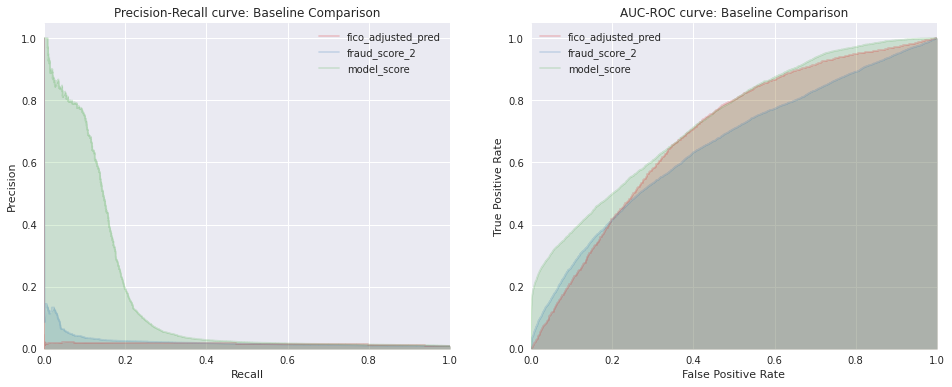

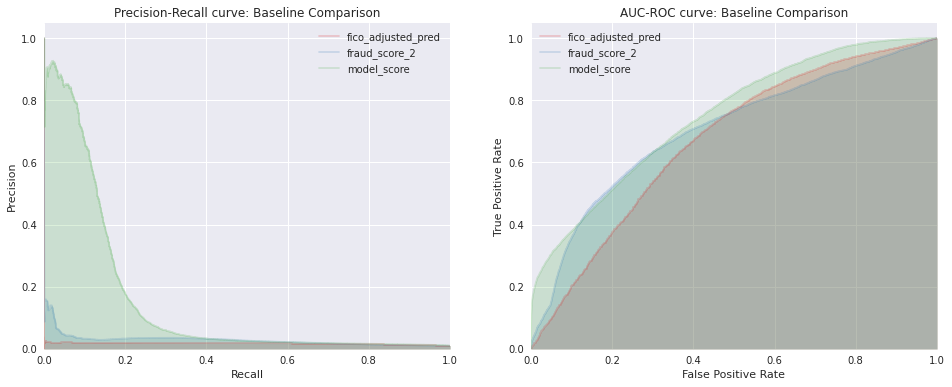

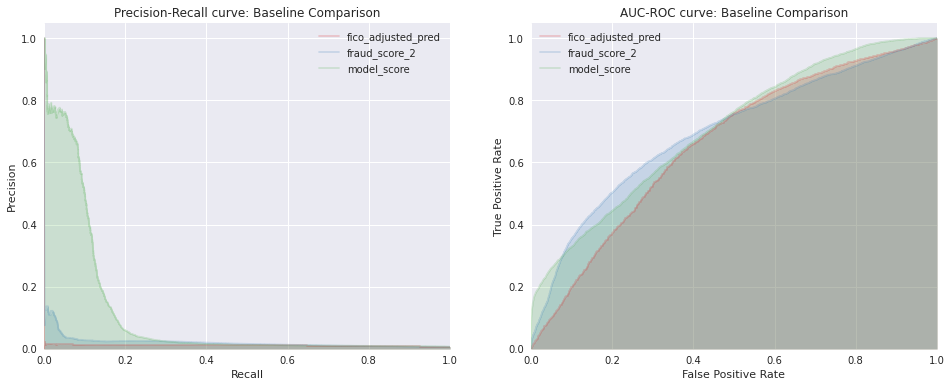

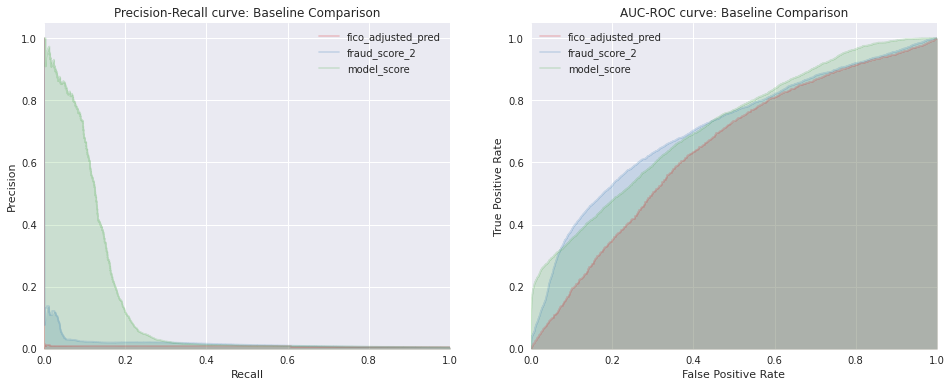

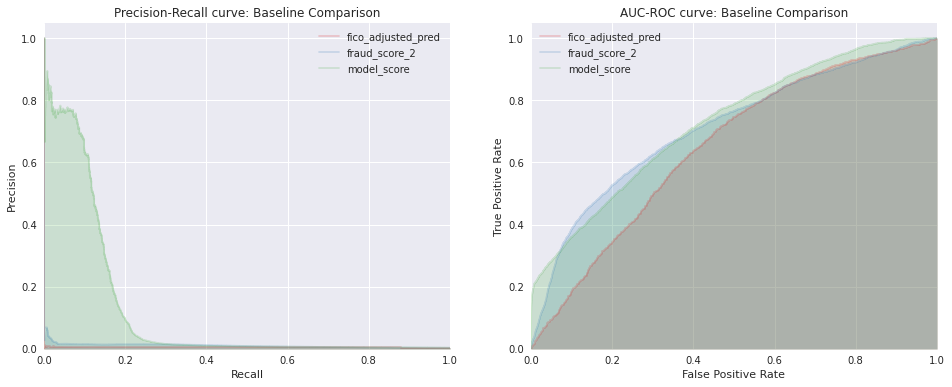

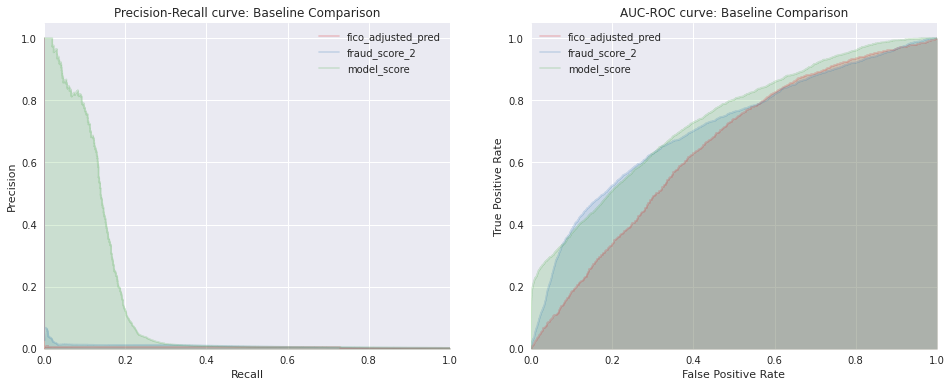

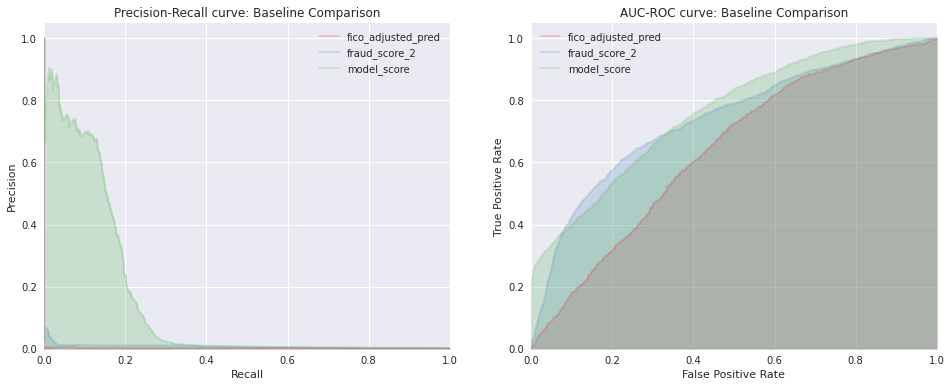

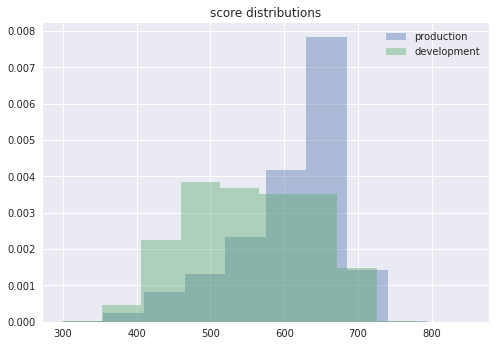

In [4]:
cm = CustomerRiskV1Monitor(artifact_path, context)
context = cm.run()